In [24]:
## Imports 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#
combined_df_matches=pd.read_csv('./data/compas_data_combined_matches.csv')
combined_df_matches.info(), display(combined_df_matches)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7185 entries, 0 to 7184
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     7185 non-null   int64  
 1   FirstName                              7185 non-null   object 
 2   LastName                               7185 non-null   object 
 3   DateOfBirth                            7185 non-null   object 
 4   priors_count                           7185 non-null   float64
 5   age                                    7185 non-null   float64
 6   v_decile_score                         7185 non-null   float64
 7   two_year_recid                         7185 non-null   float64
 8   is_recid                               7185 non-null   float64
 9   juv_fel_count                          7185 non-null   float64
 10  juv_misd_count                         7185 non-null   float64
 11  juv_

,id,FirstName,LastName,DateOfBirth,priors_count,age,v_decile_score,two_year_recid,is_recid,juv_fel_count,...,DecileScore_Risk of Recidivism,DecileScore_Risk of Violence,RawScore_Risk of Failure to Appear,RawScore_Risk of Recidivism,RawScore_Risk of Violence,_merge,Cluster0,Cluster1,Cluster2,Cluster3
0,1,miguel,hernandez,1947-04-18,0.0,69.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,left_only,1,0,0,0
1,3,kevon,dixon,1982-01-22,0.0,34.0,1.0,1.0,1.0,0.0,...,3.0,1.0,25.0,-0.76,-3.07,both,1,0,0,0
2,4,ed,philo,1991-05-14,4.0,24.0,3.0,1.0,1.0,0.0,...,4.0,3.0,26.0,-0.66,-2.26,both,0,1,0,0
3,5,marcu,brown,1993-01-21,1.0,23.0,6.0,0.0,0.0,0.0,...,8.0,6.0,19.0,0.16,-1.59,both,0,1,0,0
4,6,bouthy,pierrelouis,1973-01-22,2.0,43.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,left_only,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7180,10996,steven,butler,1992-07-17,0.0,23.0,5.0,0.0,0.0,0.0,...,7.0,5.0,14.0,0.05,-1.86,both,1,0,0,0
7181,10997,malcolm,simmons,1993-03-25,0.0,23.0,5.0,0.0,0.0,0.0,...,3.0,5.0,15.0,-0.79,-1.90,both,1,0,0,0
7182,10999,winston,gregory,1958-10-01,0.0,57.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,left_only,1,0,0,0
7183,11000,farrah,jean,1982-11-17,3.0,33.0,2.0,0.0,0.0,0.0,...,2.0,2.0,11.0,-1.50,-2.92,both,1,0,0,0


(None, None)

In [25]:
#combined_df_matches.loc[combined_df_matches.Language_English.isna()==True]._merge
combined_df_matches=combined_df_matches.loc[combined_df_matches._merge=='both']

In [26]:
print(combined_df_matches.columns)

Index(['id', 'FirstName', 'LastName', 'DateOfBirth', 'priors_count', 'age',
       'v_decile_score', 'two_year_recid', 'is_recid', 'juv_fel_count',
       'juv_misd_count', 'juv_other_count', 'c_charge_desc', 'race', 'sex',
       'score_text', 'above_45', 'below_25', 'is_felon', 'is_misdemeanor',
       'Female', 'Male', 'African-American', 'Asian', 'Caucasian', 'Hispanic',
       'Native American', 'Other', 'Language_English', 'Language_Spanish',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Separated', 'MaritalStatus_Significant Other',
       'MaritalStatus_Single', 'MaritalStatus_Unknown',
       'MaritalStatus_Widowed', 'DecileScore_Risk of Failure to Appear',
       'DecileScore_Risk of Recidivism', 'DecileScore_Risk of Violence',
       'RawScore_Risk of Failure to Appear', 'RawScore_Risk of Recidivism',
       'RawScore_Risk of Violence', '_merge', 'Cluster0', 'Cluster1',
       'Cluster2', 'Cluster3'],
      dtype='object')


In [27]:
two_year_recid=combined_df_matches.two_year_recid
is_recid=combined_df_matches.is_recid
drop = ['LastName','FirstName','id','DateOfBirth','two_year_recid',
        'is_recid','_merge','Other','Female','above_45','race','sex', 'score_text']
combined_df_matches_cleaned = combined_df_matches.drop(columns=drop)
combined_df_matches_cleaned.isnull().sum()

priors_count                             0
age                                      0
v_decile_score                           0
juv_fel_count                            0
juv_misd_count                           0
juv_other_count                          0
c_charge_desc                            0
below_25                                 0
is_felon                                 0
is_misdemeanor                           0
Male                                     0
African-American                         0
Asian                                    0
Caucasian                                0
Hispanic                                 0
Native American                          0
Language_English                         0
Language_Spanish                         0
MaritalStatus_Divorced                   0
MaritalStatus_Married                    0
MaritalStatus_Separated                  0
MaritalStatus_Significant Other          0
MaritalStatus_Single                     0
MaritalStat

In [28]:
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS,
summarize , poly)

combined_df_matches_cleaned.loc[combined_df_matches_cleaned.c_charge_desc.isna()==True]
c=combined_df_matches_cleaned.copy()
c['miss']=np.where(c.c_charge_desc==np.NaN,1,0)
c=c.drop(columns=['c_charge_desc'])

glm = sm.GLM(two_year_recid, c,family=sm.families.Binomial()) 
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
priors_count,0.1399,0.011,12.332,0.000
age,-0.0590,0.010,-5.982,0.000
v_decile_score,0.0175,0.181,0.097,0.923
juv_fel_count,0.0742,0.086,0.862,0.389
juv_misd_count,-0.0691,0.074,-0.930,0.353
juv_other_count,0.1091,0.064,1.694,0.090
below_25,0.0778,0.102,0.766,0.444
is_felon,0.1612,0.401,0.402,0.687
is_misdemeanor,-0.0202,0.403,-0.050,0.960
Male,0.3064,0.104,2.957,0.003


In [29]:
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import itertools
from sklearn import metrics
from sklearn.model_selection import KFold

kf=KFold(n_splits=10)
combined_df_matches_cleaned = combined_df_matches_cleaned.drop(columns=['c_charge_desc'])
X_train, X_test, y_train, y_test=train_test_split(combined_df_matches_cleaned,
                                                  two_year_recid,
                                                  test_size=0.33,
                                                  random_state=0)
clf=RF(random_state=0)
lamb=np.arange(1,round(combined_df_matches_cleaned.shape[1]/2))
GCV=GridSearchCV(clf,param_grid={'max_features':lamb},
                 scoring='accuracy',cv=5)
GCV.fit(X_train,y_train)
max_feats=GCV.best_params_['max_features']
max_feats

13

In [30]:
clf=RF(max_features=max_feats,random_state=0)
clf.fit(X_train,y_train)
score=clf.score(X_test,y_test)
cvscore=cross_val_score(clf,X_test,y_test,cv=10)
score,cvscore

(0.6507747318235996,
 array([0.68452381, 0.64880952, 0.66666667, 0.61904762, 0.68452381,
        0.66071429, 0.5952381 , 0.63690476, 0.68263473, 0.62874251]))

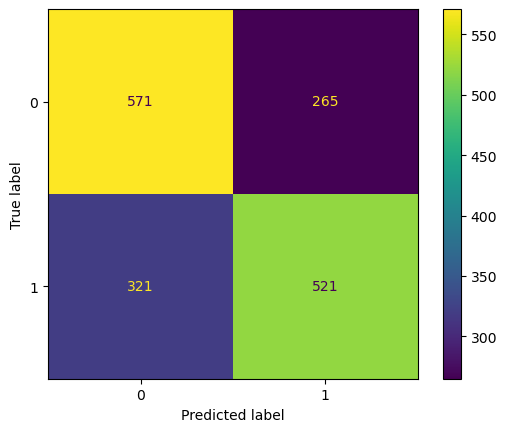

In [31]:
preds=clf.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test,preds)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                                          display_labels = [0, 1])
cm_display.plot()

In [32]:
import numpy as np
from scipy.special import expit
from scipy.optimize import minimize
from sklearn.ensemble import RandomForestClassifier


class WCRF:
    def __init__(self, n_trees=100, s=2, gamma=1, labda=1, tree_max_depth=None, combination=1, data_name=None, random_state=None):
        # build a random forest using sklearn RandomForestClassifier
        self.n_trees = n_trees
        self.s = s
        self.labda = labda
        self.gamma = gamma
        self.combination = combination
        self.data_name = data_name
        self.w = np.ones(n_trees)/n_trees
        self.model = RandomForestClassifier(n_estimators=n_trees, max_depth=tree_max_depth, random_state=random_state)
        
        
    def fit(self, X, y):
        # fit the model with training set
        self.model.fit(X,y)
        self.classes = self.model.classes_
        self.n_classes = len(self.classes)
        #################################################################################################
        #################################################################################################

        
        # calculate number of sample in each leave for every tree
        trees = self.model.estimators_
        self.leaves_sample_count = []
        for tree in trees:
            leaves_dict = {}
            n_nodes = tree.tree_.node_count
            children_left = tree.tree_.children_left
            children_right = tree.tree_.children_right
            value = tree.tree_.value.reshape((-1, self.n_classes))
            for i in range(n_nodes):
                is_leaf = (children_left[i] == children_right[i])
                if is_leaf:
                    leaves_dict[i] = value[i]
                    
            self.leaves_sample_count.append(leaves_dict)
        
        # get regions
        regions = self.model.apply(X)
#         regions = list(set(tuple(region) for region in regions))
        
        # create sample number counter dictionary for each region
        self.regions_sample_count = dict()
        sample_count_array = np.zeros((len(regions), self.n_trees,self.n_classes))
        
        # initialize sample counter for each region, the key is a region presented by tuple, the value is a ndarray
        for i in range(len(regions)):
            region = tuple(regions[i])
            self.regions_sample_count[region] = np.zeros((self.n_trees, self.n_classes))   
            
        # build sample counter for each region
            for t in range(self.n_trees):
                self.regions_sample_count[region][t] = self.leaves_sample_count[t][region[t]]
                sample_count_array[i][t] = self.leaves_sample_count[t][region[t]]

        self.regions_pred_info = dict()
## self.leaves_sample_count for each tree... for each leaf node in each tree... class counts per leaf node
## self.regions_sample_count for each region, class distribution of each leaf node in the region...
        return 
        

    def fit_w(self, X, y):
        alpha = 10
        beta = 2
        p_intervals = []
        # get falling leaves for each sample in every tree, return array (n_sample * number_trees)
        valid_regions = self.model.apply(X)
        
        for i in range(len(valid_regions)):
            region=tuple(valid_regions[i])
            if region not in self.regions_pred_info.keys():
                self.regions_sample_count[region] = np.zeros((self.n_trees, self.n_classes))
                for t in range(self.n_trees):
                    self.regions_sample_count[region][t] = self.leaves_sample_count[t][region[t]]
                self.regions_pred_info[region] = self.treat_region(region)
            pred_info = self.regions_pred_info[region]
            p_intervals.append(pred_info[3])
            
        p_intervals = np.array(p_intervals)
        p_infs = p_intervals[:,:,0]
        p_sups = p_intervals[:,:,1]

        if self.combination==1:
            k_under = (p_infs>=0.5)+0
            k_over = (p_sups>0.5)+0
        if self.combination==2:
            k_under = p_infs
            k_over = p_sups
        
        def cost_func(w, labda=self.labda, gamma=self.gamma):
            bels = (k_under*w).sum(axis=1)
            pls = (k_over*w).sum(axis=1)
            u_under = expit(alpha*(bels- 0.5))
            u_over = expit(alpha*(pls - 0.5))
            u = expit(beta*(bels - 0.5)*(pls - 0.5))

            cost = -sum(y*np.log(u_under+0.0001) + (1-y)*np.log(1-u_over+0.0001) + gamma*np.log(1-u+0.0001))/len(y) + 0.5*labda*sum(w**2)

            return cost


        def jac(w,labda=self.labda, gamma=self.gamma):
            bels = (k_under*w).sum(axis=1)
            pls = (k_over*w).sum(axis=1)
            u_under = expit(alpha*(bels- 0.5))
            u_over = expit(alpha*(pls - 0.5))
            u = expit(beta*(bels - 0.5)*(pls - 0.5))
            
            der_1 = -alpha*(y*(1-u_under))@k_under
            der_2 = alpha*((1-y)*u_over)@k_over
            der_3 = beta*(k_under.T@(u.reshape((len(y),1))*k_over) + k_over.T@(u.reshape((len(y),1))*k_under))@w - 0.5*u@(k_under+k_over)

            der_j = (der_1 + der_2 + gamma*der_3)/len(y) + labda*w
            
            return der_j
        
        cons = [{'type': 'eq', 'fun':lambda w: sum(w)-1}]

        bounds = [(0,1)] * self.n_trees
        
        w0 = np.random.rand(self.n_trees)
        res = minimize(cost_func, w0, method='SLSQP',jac=jac, constraints=cons, bounds=bounds)
        self.w = res.x
        return
        
        
    def treat_region(self, region):
        sample_count = self.regions_sample_count[region]
        sample_count[:,0] = sample_count[:,0] + sample_count[:,1]
        
        p_intervals = np.zeros_like(sample_count)
        
        p_intervals[:,0] = sample_count[:,1]/(sample_count[:,0] + self.s)
        p_intervals[:,1] = (sample_count[:,1] + self.s)/(sample_count[:,0] + self.s)

        
        # predict
        if self.combination==1:
            k_under = (p_intervals[:,0]>=0.5)+0
            k_over = (p_intervals[:,1]>0.5)+0
            bel = round(sum(k_under*self.w),4)
            pl = round(sum(k_over*self.w),4)
            
        if self.combination==2:
            bel = round(sum(p_intervals[:,0]*self.w),4)
            pl = round(sum(p_intervals[:,1]*self.w),4)
        
        if bel >= 0.5:
            prediction = self.classes[1]
        elif pl <= 0.5:
            prediction = self.classes[0]
        else:
            prediction = -1

        return (prediction, bel, pl, p_intervals, sample_count)

        
    def predict(self, X, plot=False):
        count = 0
        # intitialize prediciton list
        predictions = np.zeros(len(X))
        pred_intervals = []
        p_intervals = []
        # get falling leaves for each sample in every tree, return array (n_sample * number_trees)
        test_regions = self.model.apply(X)
        
        for i in range(len(test_regions)):
            region=tuple(test_regions[i])
            if region not in self.regions_pred_info.keys() or True:
                self.regions_sample_count[region] = np.zeros((self.n_trees, self.n_classes))
                for j in range(self.n_trees):
                    self.regions_sample_count[region][j] = self.leaves_sample_count[j][region[j]]
                self.regions_pred_info[region] = self.treat_region(region)
#                 pred_info = self.treat_region(region)
                count += 1
            pred_info = self.regions_pred_info[region]
            
            #print('bel=',pred_info[1],'pl=',pred_info[2],'pre=',pred_info[0])
            predictions[i] = pred_info[0]
            pred_intervals.append([pred_info[1], pred_info[2]])
            p_intervals.append(pred_info[3])
            
        return predictions, pred_intervals, p_intervals
    
    
    def evaluate(self, X_test, y_test,  plot=False, show_confusion_matrix=False):
        # get both imprecise and precise predictions 
        imprecise_predictions ,pred_intervals, p_intervals = self.predict(X_test, y_test)
        precise_predictions = np.zeros(len(y_test))
        if self.combination==2:
            precise_predictions = self.model.predict(X_test)
        else:
            for tree in self.model.estimators_:
                precise_predictions += tree.predict(X_test)
            precise_predictions /= self.n_trees
            precise_predictions[precise_predictions>=0.5] = self.classes[1]
            precise_predictions[precise_predictions<0.5] = self.classes[0]
        
        indeterminate_instance = (imprecise_predictions == -1)
        determinate_instance = (imprecise_predictions != -1)
        
        # calculate single-set length
        single_set_length = len(y_test) - sum(indeterminate_instance)
        
        # calculate determinacy
        determinacy = single_set_length/len(y_test)
        determinacy = round(determinacy*100, 2)
        
        # calculate single-set accuracy
        single_set_accuracy = sum(y_test[determinate_instance]==imprecise_predictions[determinate_instance])/single_set_length
        single_set_accuracy = round(single_set_accuracy*100, 2)
        
        # claculate u65
        u65_score = round(65 + (single_set_accuracy - 65)*determinacy/100, 2)
        
        # claculate precise accuracy
        precise_accuracy = sum(y_test==precise_predictions)/len(y_test)
        precise_accuracy = round(precise_accuracy*100, 2)
        
        # show confusion matrix
        if show_confusion_matrix:
            print('imprecise confusion matrix')
            cm1=metrics.confusion_matrix(y_test, imprecise_predictions)
            cm_display1=metrics.ConfusionMatrixDisplay(confusion_matrix=cm1,
                                          display_labels = [0, 1])
            cm_display1.plot()
        
            print('precise confusion matrix')
            cm2=metrics.confusion_matrix(y_test, precise_predictions)
            cm_display2=metrics.ConfusionMatrixDisplay(confusion_matrix=cm2,
                                          display_labels = [0, 1])
            cm_display2.plot()
        # return result
        return {'u65_score':u65_score, 
                'single_set_accuracy':single_set_accuracy, 
                'determinacy':determinacy, 
                'precise_accuracy':precise_accuracy}, pred_intervals, p_intervals

In [33]:
lamb=np.arange(1,10)
opt=0; opt_s=0
for i in lamb:
    print(i)
    CRF=WCRF(s=i)
    CRF.fit(X_train,y_train)
    CRF.fit_w(X_train,y_train)
    preds=CRF.predict(X_test)[0]
    if np.mean(preds==y_test)>opt:
        opt_s=i
        opt=np.mean(preds==y_test)
opt_s

1
2
3
4
5
6
7
8
9


1

In [35]:
lamb=np.arange(1,10)
opt=0; opt_gam=0
for i in lamb:
    print(i)
    CRF=WCRF(s=opt_s,gamma=i)
    CRF.fit(X_train,y_train)
    CRF.fit_w(X_train,y_train)
    preds=CRF.predict(X_test)[0]
    if np.mean(preds==y_test)>opt:
        opt_gam=i
        opt=np.mean(preds==y_test)
opt_gam

1
2
3
4
5
6
7
8
9


9

In [36]:
lamb=np.arange(1,10)
opt=0; opt_lam=0
for i in lamb:
    print(i)
    CRF=WCRF(s=opt_lam,labda=i)
    CRF.fit(X_train,y_train)
    CRF.fit_w(X_train,y_train)
    preds=CRF.predict(X_test)[0]
    if np.mean(preds==y_test)>opt:
        opt_lam=i
        opt=np.mean(preds==y_test)
opt_lam

1
2
3
4
5
6
7
8
9


2

In [38]:
print(opt_s)
print(opt_gam)
print(opt_lam)

1
9
2


In [37]:
CRF=WCRF(s=opt_s,gamma=opt_gam,labda=opt_lam)
CRF.fit(X_train,y_train)
CRF.fit_w(X_train,y_train)
CRF.w

array([1.53332780e-02, 1.17996132e-02, 6.77179012e-03, 1.40672685e-02,
       8.89797343e-04, 8.58030179e-03, 6.10716065e-03, 7.72981460e-03,
       8.18032831e-03, 4.07621548e-03, 7.88632925e-18, 1.75224680e-02,
       1.21717760e-02, 4.69208554e-02, 1.68413692e-03, 1.94955163e-02,
       1.63541155e-02, 6.20695150e-03, 9.67126882e-03, 2.79222348e-02,
       1.93673840e-02, 1.21825129e-02, 7.15899473e-03, 6.01716217e-03,
       4.28782941e-03, 1.34467929e-02, 3.19466105e-03, 3.94993383e-17,
       9.24890337e-03, 4.53212553e-03, 1.78638569e-02, 4.94286900e-03,
       1.64309939e-02, 7.13570532e-03, 8.61152787e-03, 4.26923444e-03,
       1.67298850e-02, 1.80437443e-17, 2.47267825e-02, 2.53690484e-02,
       7.29450726e-03, 3.41572646e-03, 1.61822472e-02, 1.83652748e-02,
       2.44725898e-02, 1.56505120e-02, 3.25990107e-18, 2.04561130e-17,
       2.25877461e-02, 6.27506007e-03, 9.00720083e-18, 2.72621239e-02,
       1.03697805e-02, 1.09748327e-03, 1.27019624e-02, 2.47992152e-02,
      

imprecise confusion matrix
precise confusion matrix


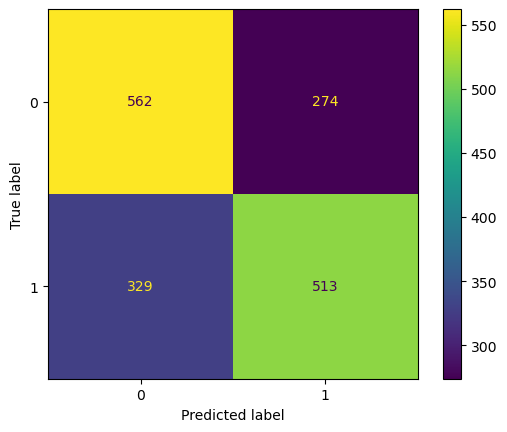

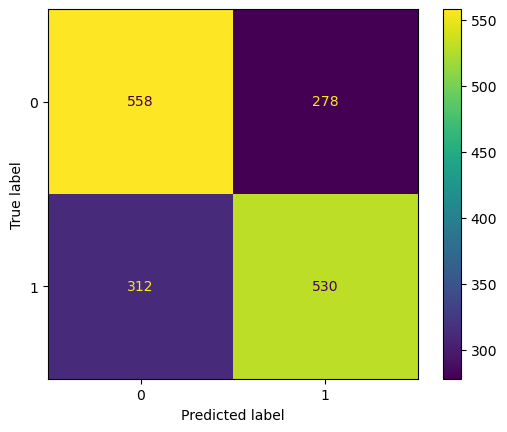

In [39]:
evals=CRF.evaluate(X_test,y_test,show_confusion_matrix=True)

In [40]:
evals

({'u65_score': 64.06,
  'single_set_accuracy': 64.06,
  'determinacy': 100.0,
  'precise_accuracy': 64.84},
 [[0.5373, 0.5373],
  [0.4161, 0.4161],
  [0.5963, 0.5963],
  [0.5254, 0.5254],
  [0.4468, 0.4468],
  [0.2742, 0.2742],
  [0.8547, 0.8547],
  [0.28, 0.28],
  [0.4471, 0.4471],
  [0.6019, 0.6019],
  [0.1045, 0.1045],
  [0.7276, 0.7276],
  [0.1559, 0.1559],
  [0.7977, 0.7977],
  [0.0241, 0.0241],
  [0.2784, 0.2784],
  [0.1595, 0.1595],
  [0.2973, 0.2973],
  [0.7835, 0.7835],
  [0.525, 0.525],
  [0.7449, 0.7449],
  [0.5662, 0.5662],
  [0.6039, 0.6039],
  [0.4202, 0.4202],
  [0.3444, 0.3444],
  [0.6909, 0.6909],
  [0.7345, 0.7345],
  [0.8371, 0.8371],
  [0.0815, 0.0815],
  [0.2948, 0.2948],
  [0.2169, 0.2169],
  [0.7936, 0.7936],
  [0.3128, 0.3128],
  [0.8708, 0.8708],
  [0.6825, 0.6825],
  [0.2044, 0.2044],
  [0.4872, 0.4872],
  [0.7058, 0.7058],
  [0.4482, 0.4482],
  [0.4902, 0.4902],
  [0.8374, 0.8374],
  [0.7009, 0.7009],
  [0.3945, 0.3945],
  [0.3711, 0.3711],
  [0.1359, 0.1359]

In [59]:
(267+315)/(499+616+267+315), (284+294)/(499+616+267+315)

(0.34295816146140246, 0.34060106069534474)

In [60]:
(331+263)/(556+547+331+263), (320+270)/(556+547+331+263)

(0.3500294637595757, 0.34767236299351795)